In [ ]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1 & 2 Cohort 6: Solutions by Ana') 
print('Local Time:', local_time)
print('Computer ID:', computer_id)


In [ ]:
# Import Libraries Pandas, NumPy, Geopandas, Matplotlib, Seaborn

import pandas as pd     # Data manipulation
import numpy as np      # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb    # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz


# Read df_1.csv and df_2.csv
df1 = pd.read_csv('df_1.csv')
df2 = pd.read_csv('df_2.csv')

#df1 = df1.dropna()
df1 = df1['RM'].str.strip().str.upper()
#df2 = df2.dropna()
df2 = df2['RM'].str.strip().str.upper()

df_final = pd.merge(df1, df2, how='outer', on='RM').reset_index(drop=True)

df_final = df_final.drop_duplicates().reset_index(drop=True)

print('Result Question #1: ')
print(df_final.sort_values(by=[('RM')]))

# Save the dataset df_final to a CSV file
df_final.to_csv('df_final.csv', index=False)



In [3]:
# Importin Libraries
import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz


# Question 2
# Merge Shapefile(provided in Cohort 6 Repo) 
# and create a map by using DataFrame.plot() with cleaned and maximized number of RMs in df_1

# Defining Directories
directory_main = 'C:/Users/direm/Desktop/Stream3Ass1/'

# Reading Yields
df_rm_final = pd.read_csv(directory_main + 'df_final.csv')

# Reading GIS
gdf_rm = gpd.read_file(directory_main + 'RuralMunicipality.shp')


In [20]:
#print('GDF_rm before delete Ceros cleaned')
#print(gdf_rm.head())

#print( gdf_rm['RMNO'].str.lstrip('0'))

# Clean GIS file
gdf_rm_cleaned = gdf_rm[['RMNO', 'RMNM', 'geometry']]

print('GEO with 3 columns')
print(gdf_rm_cleaned.head())

print('GEO with 3 columns CEROS cleaned in RMNO')
gdf_rm_cleaned['RMNO'] = gdf_rm_cleaned['RMNO'].str.lstrip('0')
print(gdf_rm_cleaned.head())


GEO with 3 columns
  RMNO             RMNM                                           geometry
0  095      GOLDEN WEST  POLYGON ((654081.000 5546088.320, 654885.320 5...
1  378        ROSEMOUNT  POLYGON ((265258.740 5810148.180, 266062.740 5...
2  288  PLEASANT VALLEY  POLYGON ((254141.490 5701256.420, 254179.510 5...
3  106     WHISKA CREEK  POLYGON ((339874.810 5539057.770, 339849.430 5...
4  132     HILLSBOROUGH  POLYGON ((445175.620 5573313.600, 445572.880 5...
GEO with 3 columns CEROS cleaned in RMNO
  RMNO             RMNM                                           geometry
0   95      GOLDEN WEST  POLYGON ((654081.000 5546088.320, 654885.320 5...
1  378        ROSEMOUNT  POLYGON ((265258.740 5810148.180, 266062.740 5...
2  288  PLEASANT VALLEY  POLYGON ((254141.490 5701256.420, 254179.510 5...
3  106     WHISKA CREEK  POLYGON ((339874.810 5539057.770, 339849.430 5...
4  132     HILLSBOROUGH  POLYGON ((445175.620 5573313.600, 445572.880 5...


C:\Users\direm\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [22]:
# Merging df_rm data with GIS
gdf_rm_final = pd.merge(gdf_rm_cleaned.rename(columns={'RMNO':'RM'}), df_rm_final, on='RM',how='inner')

gdf_rm_final.info()

gdf_rm_final.isna().sum()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RM        296 non-null    object  
 1   RMNM      296 non-null    object  
 2   geometry  296 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 7.1+ KB


RM          0
RMNM        0
geometry    0
dtype: int64

<Axes: >

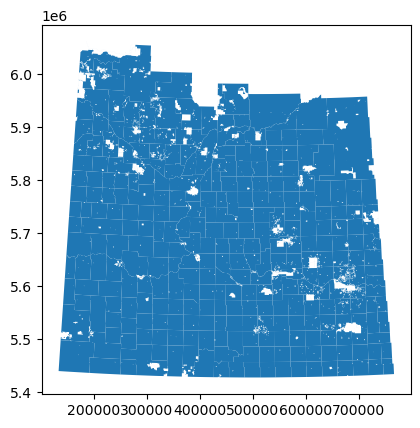

In [23]:
# Plot the merged GeoDataFrame
gdf_rm_final.plot()